# Pandas

Pandas is a **library** containing functions, methods, and data types that allow us to analyze data. To use the functions contained in pandas, we must first **import** the module. The ``as pd`` part tells the computer that whenever we want to use a function from pandas, we can refer to it using ``pd``.

In [3]:
# Make sure to run this first!!
import pandas as pd

(Tip: make your own list of common pieces of code and syntax so you can easily refer to it, like a cheat sheet.)

https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/01-Pandas-Basics-Part1.html

https://www.w3schools.com/python/pandas/pandas_ref_dataframe.asp

## Data types in pandas
| Python         | Pandas             |
|----------------|--------------------|
|String (`str`)  | Object (`object`)  |
|Integer (`int`) | Int64 (`int64`)    |
|Float (`float`) | Float64 (`float64`)|
|List (`list`)   |$\approx$ Series (`Series`)   |
|                |DataFrames (`DataFrame`)|

## Creating a variable for a file as a dataframe

### Question 1

For this tutorial demo, we will use data published by the Seattle Public Library concerning items that were checked out in April 2020. To use the file ``seattle_checkouts.csv``, you can upload this notebook directly to your Week 7 Lab folder. Note this is a csv file, so we **do not need** the parameter ``sep="\t"`` when using ``read_csv``. 

The two pieces of code below each have an error. Run the code, identify the two errors, then correct it. 



In [1]:
checkouts_df = read_csv('seattle_checkouts.csv')

NameError: name 'read_csv' is not defined

Answer: We need to write `pd.read_csv`, since `read_csv` is a function from the pandas library, not one of Python's default functions. 

In [8]:
checkouts_df = pd.read_csv('seattle_checkouts.tsv')

Answer: The file is actually named `seattle_checkouts.csv`. A typo in the filename will produce this kind of error. 

In [4]:
# Write the correct line here, then run it:
checkouts_df = pd.read_csv('seattle_checkouts.csv')

## Selecting Columns

Note: using ``print(checkouts_df)`` does not produce a nice readable output for a dataframe. Instead, you can just type the variable name and run the cell to view the dataframe. 

In [11]:
#Run this cell to see the dataframe stored in checkouts_df.
checkouts_df

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Digital,OverDrive,EBOOK,2020,4,2,Nighttime Symphony,Timbaland,"Juvenile Fiction, Picture Book Fiction","Simon & Schuster, Inc.",2019
1,Digital,OverDrive,EBOOK,2020,4,2,Cold Kill,Rennie Airth,"Fiction, Mystery, Thriller",Severn House Publishers Ltd,2020
2,Digital,OverDrive,AUDIOBOOK,2020,4,1,The Choice (Unabridged),Nicholas Sparks,"Fiction, Literature",Books on Tape,2007
3,Digital,OverDrive,EBOOK,2020,4,3,The Master Key System,Charles F. Haanel,"New Age, Nonfiction, Self-Improvement",Duke Classics,2020
4,Digital,OverDrive,EBOOK,2020,4,12,The Doughnut King,Jessie Janowitz,"Juvenile Fiction, Juvenile Literature",Sourcebooks,2019
...,...,...,...,...,...,...,...,...,...,...,...
93666,Digital,OverDrive,EBOOK,2020,4,4,"The Black Moth: Historical Romances Series, Bo...",Georgette Heyer,"Fiction, Historical Fiction, Literature, Romance",Sourcebooks,2010
93667,Digital,OverDrive,AUDIOBOOK,2020,4,1,A Death in the Family (Unabridged),James Agee,"Classic Literature, Fiction","Blackstone Audio, Inc.",2012
93668,Digital,OverDrive,EBOOK,2020,4,2,My Fate According to the Butterfly,Gail Villanueva,"Juvenile Fiction, Juvenile Literature","Scholastic, Inc. (US)",2019
93669,Digital,OverDrive,AUDIOBOOK,2020,4,17,The Second Sleep: A novel (unabridged) (Unabri...,Robert Harris,"Fiction, Suspense, Thriller",Books on Tape,2019


### Question 2
I want to isolate the columns containing the number of checkouts, title, and creator of each work, then store the resulting dataframe in a new variable. Identify the error, then correct it. 

In [13]:
trimmed_checkouts_df = checkouts_df[["checkouts", "title", "creator"]]

Answer: The column headers in this data table are capitalized, so we need to write `["Checkouts", "Title", "Creator"]`. 

## Counting values in a dataframe

### Question 3
In lecture, we used the line 

``nyt_df['title'].value_counts()`` 

to find the most common titles among the entries in the dataframe ``nyt_df``. 

**3a)** Modify the line to find the most common publication years among the items in ``checkouts_df``.

In [17]:
checkouts_df['PublicationYear'].value_counts()[:10]

PublicationYear
2013    10442
2019     9576
2017     8923
2014     8066
2018     8053
2011     7980
2015     7650
2016     6817
2012     6395
2020     5101
Name: count, dtype: int64

**3b)** Create a bar graph displaying the 10 most common publication years among the items in ``checkouts_df``.

<Axes: title={'center': 'The 10 most common publication years among items checked out of the Seattle Public Library in April 2020'}, xlabel='PublicationYear'>

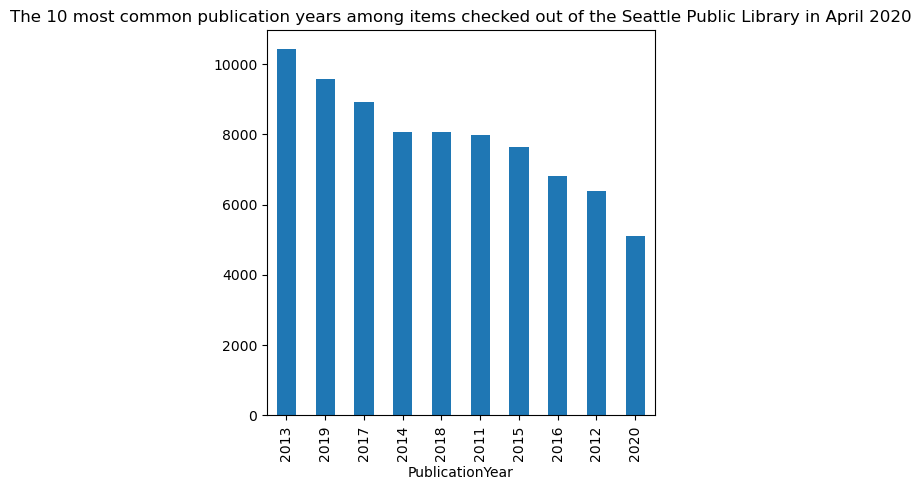

In [6]:
checkouts_df['PublicationYear'].value_counts()[:10].plot(
    kind='bar', figsize=(5, 5), title='The 10 most common publication years among items checked out of the Seattle Public Library in April 2020')

## Filtering data

### Question 4

In lecture we used the code

``nyt_df[nyt_df['author'] == 'Toni Morrison']``

to create a new dataframe containing only the entries in ``nyt_df`` written by Toni Morrison, i.e. the entries whose ``author`` value is ``'Toni Morrison'``. 

**4a)** Modify the line to get a dataframe containing only the works in ``checkouts_df`` written by Geronimo Stilton and store the result in a variable called `stilton_df`.

In [21]:
stilton_df = checkouts_df[checkouts_df['Creator'] == 'Geronimo Stilton']

In [22]:
stilton_df

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
884,Digital,OverDrive,EBOOK,2020,4,6,"Rumble in the Jungle: Geronimo Stilton Series,...",Geronimo Stilton,"Juvenile Fiction, Juvenile Literature","Scholastic, Inc. (US)",2015
1002,Digital,OverDrive,EBOOK,2020,4,1,"Stay Strong, Geronimo!: Geronimo Stilton Micek...",Geronimo Stilton,"Humor (Fiction), Juvenile Fiction, Juvenile Li...","Scholastic, Inc. (US)",2017
1741,Digital,OverDrive,EBOOK,2020,4,1,"Run for the Hills, Geronimo!: Geronimo Stilton...",Geronimo Stilton,"Juvenile Fiction, Juvenile Literature","Scholastic, Inc. (US)",2015
2371,Digital,OverDrive,EBOOK,2020,4,3,Geronimo Stilton Saves the Olympics: Geronimo ...,Geronimo Stilton,"Comic and Graphic Books, Juvenile Fiction",Macmillan Publishers,2015
3822,Digital,OverDrive,EBOOK,2020,4,2,The Race Against Time: Geronimo Stilton Journe...,Geronimo Stilton,"Humor (Fiction), Juvenile Fiction","Scholastic, Inc. (US)",2016
...,...,...,...,...,...,...,...,...,...,...,...
91589,Digital,OverDrive,EBOOK,2020,4,4,The Mysterious Message: Geronimo Stilton Micek...,Geronimo Stilton,"Humor (Fiction), Juvenile Fiction, Juvenile Li...","Scholastic, Inc. (US)",2017
92440,Digital,OverDrive,EBOOK,2020,4,6,"The Missing Movie: Geronimo Stilton Series, Bo...",Geronimo Stilton,"Humor (Fiction), Juvenile Fiction, Juvenile Li...","Scholastic, Inc. (US)",2019
93235,Digital,OverDrive,EBOOK,2020,4,3,Rescue Rebellion: Geronimo Stilton Spacemice S...,Geronimo Stilton,"Humor (Fiction), Juvenile Fiction","Scholastic, Inc. (US)",2015
93471,Digital,OverDrive,EBOOK,2020,4,2,"Wedding Crasher: Geronimo Stilton Series, Book 28",Geronimo Stilton,"Juvenile Fiction, Juvenile Literature","Scholastic, Inc. (US)",2015


**4b)** Similarly, get a dataframe containing only the works in ``checkouts_df`` that are audiobooks and store the result in a variable called ``audiobooks_df``. 

In [28]:
audiobooks_df = checkouts_df[checkouts_df['MaterialType'] == 'AUDIOBOOK']

In [29]:
audiobooks_df

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
2,Digital,OverDrive,AUDIOBOOK,2020,4,1,The Choice (Unabridged),Nicholas Sparks,"Fiction, Literature",Books on Tape,2007
9,Digital,OverDrive,AUDIOBOOK,2020,4,3,The Odessa File (Unabridged),Frederick Forsyth,"Fiction, Mystery","Blackstone Audio, Inc.",2010
22,Digital,OverDrive,AUDIOBOOK,2020,4,1,Clandestine (Unabridged),James Ellroy,"Fiction, Mystery, Thriller",HighBridge Company,2018
27,Digital,OverDrive,AUDIOBOOK,2020,4,1,Brain Power (Unabridged),Kelly Howell,"Nonfiction, Self-Improvement",Books on Tape,2008
52,Digital,OverDrive,AUDIOBOOK,2020,4,1,The Family (Abridged),Mario Puzo,"Drama, Fiction",HarperCollins Publishers Inc.,2005
...,...,...,...,...,...,...,...,...,...,...,...
93659,Digital,OverDrive,AUDIOBOOK,2020,4,4,Witness to a Trial: A Short Story Prequel to T...,John Grisham,"Fiction, Suspense, Thriller",Books on Tape,2016
93660,Digital,OverDrive,AUDIOBOOK,2020,4,3,The Virgin and the Rogue: The Rogue Files (una...,Sophie Jordan,"Fiction, Historical Fiction, Literature, Romance",HarperCollins Publishers Inc.,2020
93661,Digital,OverDrive,AUDIOBOOK,2020,4,7,Georgia Peaches and Other Forbidden Fruit (Una...,Jaye Robin Brown,"Romance, Young Adult Fiction, Young Adult Lite...","Tantor Media, Inc",2019
93667,Digital,OverDrive,AUDIOBOOK,2020,4,1,A Death in the Family (Unabridged),James Agee,"Classic Literature, Fiction","Blackstone Audio, Inc.",2012


## Using `.describe()`

### Question 5

**5a)** Write down what each of the rows in the table means.

- count:
- unique:
- top:
- mean:
- std:
- min:
- 25%:
- 50%:
- 75%:
- max:

**5b)** Some of the entries say ``NaN``, which means "Not a number". What do you think is the reason for this?

In [4]:
checkouts_df.describe(include="all")

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
count,93671,93671,93671,93671.0,93671.0,93671.000000,93671,93639,93669,93671,93668
unique,2,2,8,NaN,NaN,NaN,92371,29618,4413,522,36
top,Digital,OverDrive,EBOOK,NaN,NaN,NaN,Treasure Island,James Patterson,"Fiction, Literature","Random House, Inc.",2013
freq,93594,93594,67548,NaN,NaN,NaN,7,370,4863,13631,10442
mean,NaN,NaN,NaN,2020.0,4.0,3.785291,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.0,0.0,11.711254,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2020.0,4.0,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2020.0,4.0,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020.0,4.0,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2020.0,4.0,4.000000,NaN,NaN,NaN,NaN,NaN


**5b)** Explain how the output of ``.describe()`` differs when using different parameters.

In [6]:
checkouts_df[:5]

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Digital,OverDrive,EBOOK,2020,4,2,Nighttime Symphony,Timbaland,"Juvenile Fiction, Picture Book Fiction","Simon & Schuster, Inc.",2019
1,Digital,OverDrive,EBOOK,2020,4,2,Cold Kill,Rennie Airth,"Fiction, Mystery, Thriller",Severn House Publishers Ltd,2020
2,Digital,OverDrive,AUDIOBOOK,2020,4,1,The Choice (Unabridged),Nicholas Sparks,"Fiction, Literature",Books on Tape,2007
3,Digital,OverDrive,EBOOK,2020,4,3,The Master Key System,Charles F. Haanel,"New Age, Nonfiction, Self-Improvement",Duke Classics,2020
4,Digital,OverDrive,EBOOK,2020,4,12,The Doughnut King,Jessie Janowitz,"Juvenile Fiction, Juvenile Literature",Sourcebooks,2019


In [10]:
checkouts_df.describe(include="object")

,UsageClass,CheckoutType,MaterialType,Title,Creator,Subjects,Publisher,PublicationYear
count,93671,93671,93671,93671,93639,93669,93671,93668
unique,2,2,8,92371,29618,4413,522,36
top,Digital,OverDrive,EBOOK,Treasure Island,James Patterson,"Fiction, Literature","Random House, Inc.",2013
freq,93594,93594,67548,7,370,4863,13631,10442


In [11]:
checkouts_df.describe(include="int64")

,CheckoutYear,CheckoutMonth,Checkouts
count,93671.0,93671.0,93671.000000
mean,2020.0,4.0,3.785291
std,0.0,0.0,11.711254
min,2020.0,4.0,1.000000
25%,2020.0,4.0,1.000000
50%,2020.0,4.0,2.000000
75%,2020.0,4.0,4.000000
max,2020.0,4.0,1894.000000


In [12]:
# Observe what happens if I try this:

checkouts_df.describe(include="Creator")

# I get an error because the parameter must be a data type; I can't use a column name, for example. 

TypeError: data type 'Creator' not understood

# Lab 7 Review

**Question 6**

**6a)** What is the difference between the following two lines of code? 

In [5]:
checkouts_df['Title'].value_counts()[:10]

Title
Treasure Island                                              7
Black Beauty                                                 6
The Time Machine                                             6
Jane Eyre                                                    6
Frankenstein                                                 6
Dracula                                                      6
The Road Home                                                5
Madame Bovary                                                5
Pride and Prejudice                                          5
Anne of Green Gables: Anne of Green Gables Series, Book 1    5
Name: count, dtype: int64

In [6]:
checkouts_df.nlargest(10, 'Checkouts')

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
46348,Digital,OverDrive,AUDIOBOOK,2020,4,1894,Harry Potter and the Sorcerer's Stone: Harry P...,J. K. Rowling,"Juvenile Fiction, Juvenile Literature",Pottermore,2012
78951,Digital,OverDrive,EBOOK,2020,4,743,Harry Potter and the Sorcerer's Stone: Harry P...,J. K. Rowling,"Juvenile Fiction, Juvenile Literature",Pottermore,2012
86961,Digital,OverDrive,EBOOK,2020,4,565,Becoming,Michelle Obama,"African American Nonfiction, Biography & Autob...","Random House, Inc.",2018
30319,Digital,OverDrive,EBOOK,2020,4,553,"Funny, You Don't Look Autistic: A Comedian's G...",Michael McCreary,"Biography & Autobiography, Performing Arts, So...",Annick Press,NaN
30025,Digital,OverDrive,AUDIOBOOK,2020,4,520,Becoming (Unabridged),Michelle Obama,"African American Nonfiction, Biography & Autob...",Books on Tape,2018
76066,Digital,OverDrive,EBOOK,2020,4,478,Educated: A Memoir,Tara Westover,"Biography & Autobiography, Nonfiction, Religio...","Random House, Inc.",2018
59372,Digital,OverDrive,EBOOK,2020,4,462,Where the Crawdads Sing,Delia Owens,"Fiction, Literature","Penguin Group (USA), Inc.",2018
33571,Digital,OverDrive,AUDIOBOOK,2020,4,433,Everything I Never Told You (Unabridged),Celeste Ng,"Fiction, Literature","Blackstone Audio, Inc.",2014
39473,Digital,OverDrive,EBOOK,2020,4,409,"Crazy Rich Asians: Crazy Rich Asians Series, B...",Kevin Kwan,"Fiction, Humor (Fiction), Literature, Romance","Random House, Inc.",2013
81117,Digital,OverDrive,AUDIOBOOK,2020,4,354,Talking to Strangers: What We Should Know abou...,Malcolm Gladwell,"Nonfiction, Psychology, Sociology","Blackstone Audio, Inc.",2019


**6b)** Why do you think the most checked-out books do not coincide with the most frequently listed writers? Do you think we can conclude that J.K. Rowling is the author whose works were checked out the most in this time period?

In [7]:
checkouts_df['Creator'].value_counts()[:20]

Creator
James Patterson              370
Daisy Meadows                219
Agatha Christie              211
Gertrude  Chandler Warner    174
Geronimo Stilton             172
Mary Pope Osborne            170
Stephen King                 168
Louis L'Amour                167
Nora Roberts                 158
Erin Hunter                  152
Dan Gutman                   147
M. C. Beaton                 144
Stuart Woods                 144
Stan Berenstain              136
DK                           131
Robert B. Parker             120
Janet Evanovich              116
Clive Cussler                116
J. A. Jance                  112
Debbie Macomber              111
Name: count, dtype: int64